<a href="https://colab.research.google.com/github/matcyr/APBJC2024_GNN_Tutorial/blob/master/notebooks/APBJC_tutorial_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Tutorial to Drug Response Prediction using Graph Neural Network

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Tutorial Notebook:**
[![View on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/notebooks/APBJC_tutorial.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/matcyr/APBJC2024_GNN_Tutorial/blob/master/notebooks/APBJC_tutorial_colab.ipynb)  

**Authors and Presenters:**

- **Prof. Dennis Wang** <sup>1, 3, 4, 5</sup>, [dennis_wang@sics.a-star.edu.sg](mailto:dennis_wang@sics.a-star.edu.sg)
- **Dr. Evelyn Lau** <sup>1</sup>, [evelyn_lau@sics.a-star.edu.sg](mailto:evelyn_lau@sics.a-star.edu.sg)
- **Yurui Chen** <sup>1, 2</sup>, [chenyr@sics.a-star.edu.sg](mailto:chenyr@sics.a-star.edu.sg) [![GitHub](https://img.shields.io/static/v1.svg?logo=github&label=GitHub&message=Yurui%20Chen&color=lightgrey)](https://github.com/matcyr)

**Affiliations:**

1. Institute for Human Development and Potential (IHDP), Agency for Science, Technology and Research (A*STAR), Singapore

2. Department of Mathematics, National University of Singapore, Singapore, Republic of Singapore

3. A*STAR Bioinformatics Institute (BII), Singapore

4. National Heart and Lung Institute, Imperial College London, London, UK

5. Department of Computer Science, The University of Sheffield, Sheffield, UK

---
**Recent Publications**:
- Chen Y., Zhang L.* (2022) How much can deep learning improve prediction of the responses to drugs in cancer cell lines? *Briefings in Bioinformatics*, 23(1):bbab378, 2022. [https://doi.org/10.1093/bib/bbab378](https://doi.org/10.1093/bib/bbab378)

- Chen Y., Zhang L.* (2024) Hi-GeoMVP: hierarchical geometry enhanced multi-view graph neural network for drug response prediction. *Bioinformatics*. [https://doi.org/10.1093/bioinformatics/btae204](https://doi.org/10.1093/bioinformatics/btae204)

- Giraldo JJ., Lau E., Dharmapalan S., Parker M., Chen Y., Alvarez M., Wang D.* (2023) Multi-output prediction of dose-response curves enable drug repositioning and biomarker discovery. *npj Precision Oncology*, 2024.[https://doi.org/10.1038/s41698-024-00691-x](https://doi.org/10.1038/s41698-024-00691-x)






Drug response prediction is an important area of research in precision medicine. The goal is to predict how different drugs will affect a particular cell line or patient, which can help in tailoring personalized treatment plans.

In this tutorial, we will build a Graph Neural Network (GNN) model to predict drug responses based on features derived from both the drugs and the target cells. The GNN approach is particularly well-suited for learning a vector (representation) from a small molecule graph.

We will cover data processing, building the model, and running predictions step by step.


## Learning Objectives

By the end of this tutorial, you will:

- **Aim 1**: Understand the basics of the drug response prediction problem. (Sec. 1~3)
  - 1.1: Learn what constitutes drug response data (features: genomics + chemical, outcome: drug response).
  - 1.2: Understand the components of machine learning and deep learning pipelines in this context.
  
- **Aim 2**: Gain foundational knowledge on processing small molecule data. (Sec. 4)
  - 2.1: Understand the importance of structural information for small molecules.
  - 2.2: Learn how to derive a chemical graph from SMILES (a string-based representation for molecules) and visualize it.
  - 2.3: Understand how to mathematically represent a graph.
  - 2.4: Prepare the required inputs for the Graph Neural Network (GNN).

- **Aim 3**: Learn the basics of Graph Neural Networks (GCN and GIN). (Sec. 5)
  
- **Aim 4**: Follow a pipeline to train and evaluate machine learning and deep learning models for drug response prediction. (Sec. 6)
  - 4.1: Define the deep learning model using GNN.
  - 4.2: Train and test the model.
  - 4.3: Visualize model performance.
  - 4.4: Compare the GNN model with baseline models.

# 1. Machine Learning for Drug Development


<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/intro/fig1.png?raw=1" alt="drug_discovery" width="800" height="500">

Drug development takes many years starting from thousands of candidate compounds. Many fail to be beneficial for patients and do not receive regulatory approval (e.g. FDA). Smarter ways to screen for drugs are needed in order to save the industry time and money.

## 1.1 Drug Response on Cancer Cell-lines
<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/intro/fig2.png?raw=1" alt="GDSC_project" width="800" height="300">

The effectiveness of cancer drugs are often measured in the lab before being given to patients. Different concentrations of a drug are tested to see how effective it is at killing cancer cells.

A dose-response curve is generated showing the relationship between drug concentration and cell response (e.g. viability). Measures such as IC50, the concentration required to inhibit the cell by half, can be used to describe response of a drug.


<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/intro/fig3.png?raw=1" alt="GDSC_project" width="1200" height="300">

From the dose-response curve, we can identify conditions when the cell is sensitive to a drug and when it does not respond. The cell’s genetics and the chemistry of the drug are often the determinants of response.


## 1.2 Machine Learning Predicts Drug Response
<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/intro/fig4.png?raw=1" alt="GDSC_project" width="800" height="500">


Empirically testing a large library of chemical structures to get the desired dose-response can be very resource intensive and expensive. Fortunately, many drug screening experiments have already been done, and we can use machine learning to predict the response of a drug based on its chemical structure.


## Setup
Before we start, Let's setup the required environment first:

In [1]:
import os

# Define the repository details
repo_name = "APBJC2024_GNN_Tutorial"
repo_url = "https://github.com/matcyr/APBJC2024_GNN_Tutorial"

# Check if the repository directory exists
if not os.path.isdir(repo_name):
    # Clone the repository only if it doesn't exist
    !git clone {repo_url}
else:
    print(f"Repository '{repo_name}' already exists. Skipping clone.")

# Change directory to the notebooks folder
notebooks_path = os.path.join(repo_name, "notebooks")
os.chdir(notebooks_path)
print("Current working directory:", os.getcwd())

Cloning into 'APBJC2024_GNN_Tutorial'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 364 (delta 97), reused 94 (delta 40), pack-reused 201 (from 1)
Receiving objects: 100% (364/364), 122.39 MiB | 8.05 MiB/s, done.
Resolving deltas: 100% (183/183), done.
Updating files: 100% (38/38), done.
Current working directory: /content/APBJC2024_GNN_Tutorial/notebooks


In [3]:
# Install necessary dependencies
!pip install openpyxl
!pip install pyarrow
!pip install fastparquet

# Install dependencies for processing drug data
!pip install pubchempy
!pip install rdkit-pypi  # Install rdkit from PyPI instead of rdkit
# Install torch geometric dependencies
!pip install torch-geometric

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13818 sha256=0ee6e08f27d8ba5335689afa611932759623e6014056664bd1a2fc79cb52992b
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:00


In [ ]:
!pip install "numpy<2" --upgrade --force-reinstall

# 2. Drug Response Dataset

In this tutorial, we use the **Genomics of Drug Sensitivity in Cancer (GDSC)** as our dataset. The GDSC project is a comprehensive resource aimed at identifying the molecular characteristics of cancer cells that predict sensitivity to anti-cancer drugs. It integrates drug response data from thousands of cell lines with genomic, transcriptomic, and proteomic features to study the impact of genetic variants on drug sensitivity.

## Learning Objectives
In this Section, we will try to focus on **Aim 1.1**.


<!-- ![GDSC Project Overview](https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/GDSC_project.png?raw=1) -->
<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/GDSC_project.png?raw=1" alt="GDSC_project" width="900" height="400">

*Overview of the GDSC project from the paper "A Landscape of Pharmacogenomic Interactions in Cancer" by Iorio et al., published in Cell, Volume 166, Issue 3, pages 740 - 754 (2016).*

---

#### GDSC Dataset

**GDSC1** represents the initial phase of the GDSC project, with screenings conducted **before 2015**. This dataset includes:

- **970 cancer cell lines**.
- **403 drugs** focused primarily on well-established therapeutic agents.


**GDSC2** is the expanded phase of the project, with data generated **after 2015**. It includes:

- **969 cancer cell lines**, with some overlap but also new cell lines not present in GDSC1.
- **297 drugs**, including newer experimental compounds targeting a broader range of cancer pathways.

---

In this notebook, we will focus on **GDSC2**, as it provides more recent and comprehensive data on drug responses across a wider array of compounds, making it suitable for analyzing modern cancer therapies.



In [6]:
import pandas as pd
import os
import pubchempy as pcp
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils import *
from Model.DRP_GNN import DrpModel
# Initialize the class with appropriate URLs
processor = GDSCProcessor(
    gdsc_link='https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.5/GDSC2_fitted_dose_response_27Oct23.xlsx',
    drug_meta_link='https://www.cancerrxgene.org/api/compounds?list=all&export=csv',
    exp_data_link='https://www.cancerrxgene.org/gdsc1000/GDSC1000_WebResources//Data/preprocessed/Cell_line_RMA_proc_basalExp.txt.zip',
    verbose = True,
    data_path = '../Data/'
)
# Run the full process
processor.run()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
-----------------
The first 5 rows of the GDSC data:
  DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
0   GDSC2             343       15946310     683667         PFSK-1   
1   GDSC2             343       15946548     684052           A673   
2   GDSC2             343       15946830     684057            ES5   
3   GDSC2             343       15947087     684059            ES7   
4   GDSC2             34

## 2.1 Overview of the Drug Response Prediction

<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/DRP_overview.png?raw=1" alt="DRPoverview" width="900" height="400">

## 2.2 Cancer Cell Lines

Cancer cell lines (CCLs) are used as model systems for studying drug response and genetic features of cancer. The GDSC dataset includes CCLs derived from a variety of cancer types, including breast, lung, colon, and many more. Each CCL has its own set of molecular features, such as gene expression data, mutation status, and copy number variations. In this notebook, we use the RNAseq data, as the omic feature.


### Summary of Cancer Types in GDSC2

After processing the dataset, we identified **31 distinct cancer types** (excluding the `UNCLASSIFIED` category). Each cancer type is associated with a unique number of cell lines, which can be used to analyze drug sensitivity patterns.

In the GDSC2 dataset, there is one category labeled `UNCLASSIFIED`, representing cell lines that do not fall into the predefined cancer types. For this analysis, we have excluded the `UNCLASSIFIED` category and focused on the main cancer types.

In [7]:
cancer_df = processor.df.groupby('TCGA_DESC')['COSMIC_ID'].nunique().reset_index()
cancer_df.set_index('TCGA_DESC', inplace=True)
cancer_df.columns = ['Number of Unique Cell Lines']
cancer_df.sort_values('Number of Unique Cell Lines', ascending=False, inplace=True)
## Drop UNCLASSIFIED and nan in 'TCGA_DESC'
cancer_df = cancer_df[cancer_df.index != 'UNCLASSIFIED'].dropna()
print(f'There are {len(cancer_df)} cancer types and one \'UNCLASSIFIED\' cancer in GDSC2.')

There are 31 cancer types and one 'UNCLASSIFIED' cancer in GDSC2.


### Top 10 Cancer Types by Number of Unique Cell Lines

The table below shows the **top 10 cancer types** with the highest number of unique cell lines in the GDSC2 dataset:

| Cancer Type (TCGA_DESC) | Number of Unique Cell Lines |
|-------------------------|-----------------------------|
| LUAD (Lung Adenocarcinoma)     | 62                          |
| SCLC (Small Cell Lung Cancer)  | 59                          |
| SKCM (Skin Cutaneous Melanoma) | 54                          |
| BRCA (Breast Cancer)           | 51                          |
| COREAD (Colorectal Cancer)     | 46                          |
| HNSC (Head and Neck Cancer)    | 39                          |
| ESCA (Esophageal Cancer)       | 35                          |
| DLBC (Diffuse Large B-Cell Lymphoma) | 34                   |
| GBM (Glioblastoma Multiforme)  | 34                          |
| OV (Ovarian Cancer)            | 34                          |

These cancer types represent the most frequently occurring cancer cell lines in the dataset and provide a broad range of data for drug sensitivity analysis.


In [1]:
print(cancer_df.head(5))

NameError: name 'cancer_df' is not defined


### Key Aspects of CCL Data:
- **COSMIC_ID**: A unique identifier for each CCL, provided by the Catalogue of Somatic Mutations in Cancer (COSMIC) database.
- **Gene Expression Profiles**: RNA sequencing data that provides the expression levels of thousands of genes across different CCLs.
<!-- - **Mutation Data**: Information on specific mutations found in each CCL, which may contribute to drug sensitivity or resistance. -->

By linking drug response data to CCL molecular features, we can investigate the relationships between genetic alterations and drug efficacy.

In [9]:
processor.exp_df.head()

GENE_SYMBOLS,TSPAN6,TNMD,DPM1,SCYL3,C1ORF112,FGR,CFH,FUCA2,GCLC,NFYA,...,LINC00526,PPY2,unknown_gene_315,unknown_gene_316,KRT18P55,unknown_gene_317,POLRMTP1,UBL5P2,TBC1D3P5,unknown_gene_318
683667,7.780713,2.753253,9.960137,4.351073,3.716740,3.222277,8.221606,3.823474,4.756228,5.805642,...,3.347520,3.230712,3.032447,9.040972,3.102091,2.870875,3.169188,9.810431,3.266915,8.452080
684052,7.301344,2.890533,9.922489,4.125088,3.678987,3.096576,3.588391,4.809305,4.951782,5.089165,...,5.054260,3.003521,2.874737,8.532759,3.068187,2.874065,3.135479,9.073222,3.098364,6.824238
684057,8.233101,2.824687,10.015883,4.749715,3.839433,3.142755,5.329830,3.272124,5.538055,6.428482,...,6.261573,3.031862,3.370459,8.930821,3.322455,3.083922,2.813440,8.893197,3.266184,8.758288
684059,8.333467,3.966757,9.793991,3.976923,3.505669,3.079943,3.373640,4.199048,5.794734,5.902391,...,3.885425,2.993918,2.843472,8.246666,3.219777,3.683564,3.033869,8.691401,3.279230,8.236238
684062,8.391340,2.968360,10.260679,4.295876,4.129471,3.318760,7.103957,3.447994,5.988207,6.257495,...,5.584552,2.959515,2.952987,8.625519,3.056066,3.059551,3.127004,9.396461,3.217885,7.248236


In [10]:
### Normalize the gene expression data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
## apply it to the processor.exp_df
processor.exp_df.iloc[:, :] = scaler.fit_transform(processor.exp_df.values)
cosmics_to_idx = {cosmic_id: idx for idx, cosmic_id in enumerate(processor.exp_df.index)}

In [11]:
processor.exp_df.head()

GENE_SYMBOLS,TSPAN6,TNMD,DPM1,SCYL3,C1ORF112,FGR,CFH,FUCA2,GCLC,NFYA,...,LINC00526,PPY2,unknown_gene_315,unknown_gene_316,KRT18P55,unknown_gene_317,POLRMTP1,UBL5P2,TBC1D3P5,unknown_gene_318
683667,0.575582,-0.486487,-0.132586,0.198957,0.056342,-0.286379,2.248935,-2.045783,-1.113481,0.880329,...,-1.438214,0.682399,-0.561209,1.114135,-0.795939,-0.500820,0.074128,1.053064,-0.448461,1.078083
684052,0.321740,0.182039,-0.201310,-0.225674,-0.033172,-0.415334,-0.499528,-1.453582,-0.930443,-0.222554,...,0.162339,-0.735768,-1.019863,0.132397,-0.930297,-0.498385,-0.055235,-0.406608,-1.380961,-0.956245
684057,0.815137,-0.138618,-0.030825,0.948011,0.347257,-0.367960,0.533509,-2.376985,-0.381689,1.839076,...,1.294538,-0.558856,0.421798,0.901352,0.077360,-0.338151,-1.291130,-0.763058,-0.452506,1.460755
684059,0.868284,5.423033,-0.435874,-0.504078,-0.444121,-0.432397,-0.626920,-1.820171,-0.141437,1.029256,...,-0.933776,-0.795712,-1.110786,-0.420262,-0.329552,0.119700,-0.445186,-1.162615,-0.380330,0.808345
684062,0.898930,0.561040,0.416032,0.095239,1.034958,-0.187399,1.585936,-2.271338,0.039655,1.575873,...,0.659638,-1.010460,-0.792296,0.311585,-0.978333,-0.356759,-0.087761,0.233406,-0.719715,-0.426370


## 2.3 Drugs

In addition to drug response data, the GDSC dataset includes information about the drugs themselves. Each drug is characterized by various chemical properties that can be used to predict its effectiveness in inhibiting cancer cell growth.

### Key Aspects of Drug Features:
- **PubChem ID**: A unique identifier for each drug in the PubChem database.
- **SMILES**: A textual representation of the molecular structure of the drug, which can be used to calculate molecular descriptors for quantitative structure-activity relationship (QSAR) modeling.
- **Pathway Information**: Many drugs target specific biological pathways (e.g., PI3K/AKT/mTOR signaling) that are dysregulated in cancer cells. Understanding these pathways helps identify which drugs might be effective against particular cell lines.
<!-- - **Molecular Descriptors**: Features such as molecular weight, LogP (partition coefficient), and hydrogen bond donors/acceptors provide additional information about the chemical properties of each drug. These descriptors can be used to predict drug efficacy. -->

By integrating drug features with cell line molecular data, we can build predictive models for drug response, identify potential biomarkers of sensitivity, and uncover novel therapeutic strategies for cancer treatment.

In [12]:
processor.df['PATHWAY_NAME']

drug_df = processor.df.groupby('PATHWAY_NAME')['DRUG_ID'].nunique().reset_index()
drug_df.set_index('PATHWAY_NAME', inplace=True)
drug_df.columns = ['Number of Unique Drugs']
drug_df.sort_values('Number of Unique Drugs', ascending=False, inplace=True)
drug_df = drug_df[drug_df.index != 'Unclassified'].dropna()
drug_df = drug_df[drug_df.index != 'Other'].dropna()
print(f'There are {len(drug_df)} pathways in GDSC2, one \'Unclassified\', and  one \'Other\' drug target pathway.')

There are 22 pathways in GDSC2, one 'Unclassified', and  one 'Other' drug target pathway.



### Top 10 Drug Target Pathways by Number of Unique Drugs

The table below shows the **top 10 drug target pathways** with the highest number of unique drugs in the GDSC2 dataset:

| Pathway Name                  | Number of Unique Drugs |
|-------------------------------|------------------------|
| PI3K/MTOR signaling            | 27                     |
| Other, kinases                 | 22                     |
| DNA replication                | 21                     |
| ERK MAPK signaling             | 15                     |
| Chromatin histone methylation  | 13                     |
| Apoptosis regulation           | 13                     |
| Cell cycle                     | 13                     |
| Genome integrity               | 13                     |
| RTK signaling                  | 12                     |
| Chromatin other                | 10                     |

These pathways represent the most frequently targeted mechanisms by drugs in the dataset. **PI3K/MTOR signaling** is the most targeted pathway, with 27 unique drugs, followed by **DNA replication** and **ERK MAPK signaling**.

In [13]:
drug_df.head(5)

,Number of Unique Drugs
PATHWAY_NAME,
PI3K/MTOR signaling,27
"Other, kinases",22
DNA replication,21
ERK MAPK signaling,15
Chromatin histone methylation,13


## 2.4 Drug Response Metric

The GDSC dataset provides **IC50** (half maximal inhibitory concentration) values for hundreds of drugs across various cancer cell lines. The **IC50** value represents the concentration of a drug required to inhibit a biological process (such as cell growth) by 50%. Lower IC50 values indicate higher sensitivity of the cell line to the drug.

### Key Aspects of Drug Response Data:
- **IC50 values**: A measure of how effective a drug is at inhibiting cancer cell proliferation.
- **Drug ID**: Each drug is assigned a unique ID in the dataset.
- **COSMIC_ID**: Each cell line is identified by a unique COSMIC ID, which allows for linking the drug response data to other genomic features of the cell line.

The GDSC dataset contains IC50 values for hundreds of drugs tested across over 1,000 cancer cell lines. This information is critical for understanding which cell lines are more sensitive or resistant to particular drugs.

In [14]:
## Check how many unique drugs
num_drugs = len(processor.df['DRUG_ID'].unique())
print(f'There are {num_drugs} drug in GDSC2.') # 295 unique drugs
## Check how many unique cell lines
num_CCLs = len(processor.df['COSMIC_ID'].unique())
print(f'There are {num_CCLs} cancer cell lines in GDSC2.') # 969 unique cell lines

There are 295 drug in GDSC2.
There are 969 cancer cell lines in GDSC2.


In [15]:
processor.GDSC2_df.head()

,PubCHEM,COSMIC_ID,LN_IC50
0,24360,683667,-1.463887
1,24360,684052,-4.869455
2,24360,684057,-3.360586
3,24360,684059,-5.044940
4,24360,684062,-3.741991


# 3. Deep Learning for Drug Response Predictions

Drug response prediction is a supervised machine learning (ML) problem. ML models learn patterns and relationships that help in predicting how different cancer cell lines will respond to specific drugs.

Deep Learning (DL) techniques have become a powerful tool for predicting drug response in cancer research. By integrating multi-modal data sources, such as genomic features, molecular structure, and drug screening results, DL facilitates more personalized and effective cancer therapies.

## Learning Object:
In this Section, we will try to focus on **Aim 1.2**.


## 3.1 Key Components of DL for Drug Response Prediction:

1. **Feature Representation**:
    - **Drug Features**: Molecular structure information such as SMILES strings can be transformed into numerical representations (e.g., molecular fingerprints or graph-based representations).
    - **Cell Line Features**: Omics features (e.g., gene expression, mutations) of the cancer cell lines are critical inputs.
   
2. **Modeling**:
    - **Drug and Cell Line Encoders**: Feature encoders for drugs and cell lines learn useful embeddings to improve model performance.

3. **Prediction**:
    - The ML model predicts the drug response for a given drug-cell line pair, producing an output such as the IC50 value, which indicates drug efficacy.

In the figure below, we illustrate the common model used for drug response prediction. The model takes drug features and cell line features, processes them through respective encoders, and produces a prediction of drug response (IC50).



<!-- <object data="../Figures/figure_pipeline.pdf" type="application/pdf" width="100%" height="600px">
    <p>Your browser does not support PDF embedding. <a href="../Figures/figure_pipeline.pdf">Download the PDF</a> to view it.</p>
</object> -->

<!-- ![DRP Pipeline](https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/DRP_pipeline.png?raw=1) -->
<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/DRP_pipeline.png?raw=1" alt="DRP Pipeline" width="900" height="400">

*Figure 2: Machine Learning pipeline for drug response prediction, showing the process of encoding both drug and cell line features for IC50 prediction.*


## 3.2 Train-Test Split:

- **test_size=0.3**: This specifies that 30% of the data will be used as the test set, while the remaining 70% will be used to train the model.
- **random_state=42**: This ensures the split is reproducible. Using the same random state value guarantees that the data is split in the same way every time the code is run.

By performing this split, we ensure that the model’s performance is evaluated on a separate dataset that was not used during training, giving us a realistic understanding of how well the model can predict drug response for unseen cancer cell lines and drug pairs.

<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/mix_test.png?raw=1" alt="DRP Pipeline" width="400" height="500">

*Figure 3: Mixed test for the drug response prediction.*

# 4. Molecules Graph Representation

The structure of a small molecule plays a critical role in determining its chemical and biological properties. In drug discovery and cancer research, molecular structure affects how a drug interacts with its target, its ability to be absorbed, distributed, metabolized, and excreted in the body, as well as its overall efficacy and toxicity. Understanding and visualizing these structures helps researchers predict drug response and optimize therapeutic strategies.


### Learning Object:
We will address **Aim 2.1** here.

##  4.1 Why Molecular Structure Matters?

1. **Binding Affinity**: The three-dimensional arrangement of atoms in a molecule determines its ability to bind to specific receptors or enzymes in a biological system. Small changes in the structure can significantly alter the binding affinity, directly influencing the drug’s potency.
  
2. **Solubility and Permeability**: The functional groups and overall geometry of the molecule affect its solubility in water or lipids, which impacts the drug's absorption and distribution across cell membranes.

3. **Stability and Metabolism**: Structural features determine how easily a drug is metabolized by enzymes in the liver or other tissues. Certain molecular configurations may be more resistant to degradation, resulting in a longer duration of action, while others are quickly broken down and excreted.

4. **Toxicity**: Some structural motifs can lead to unwanted side effects or toxicity. Understanding the structure-property relationship helps in designing safer drugs with fewer side effects.

In cheminformatics, SMILES (Simplified Molecular Input Line Entry System) is a widely used notation for describing the structure of chemical compounds. However, to better understand the structure of a molecule, it can be useful to visualize the molecule as a graph, where atoms are represented as nodes and chemical bonds as edges.

### Steps?
In this section, you will follow:


1. **SMILES to Molecule Conversion**: We will use RDKit to convert a SMILES string into a molecular object. RDKit is a powerful toolkit that provides tools for chemical informatics, including functions to parse SMILES strings.
  
2. **Molecule to Graph**: After converting the SMILES string into a molecular object, we will transform this molecule into a graph. In the graph, each atom will be a node, and each bond will be an edge.

3. **Visualization**: Finally, we will use `networkx` to visualize the graph structure. Each atom will be labeled with its atomic symbol, and edges between atoms will represent the bonds in the molecule.



## 4.2 Molecule Graph


In graph-based machine learning, it's common to represent molecules as graphs, where atoms serve as nodes and chemical bonds represent edges. For machine learning tasks, we need a structured format, such as an adjacency matrix to represent the connections between atoms, and node features to describe the properties of each atom. In this section, we will convert a molecule from its SMILES representation into two essential components: **Adjacency Matrix** and **Node Features**.


### Learning Object:
We will address **Aim 2.2** here.

The SMILES string we will work with in this section is: `C1=C(C(=O)NC(=O)N1)F`, which is the drug **5-Fluorouracil**.
This represents a molecule where sulfur and oxygen atoms form a key part of the structure, along with carbon atoms and single bonds.


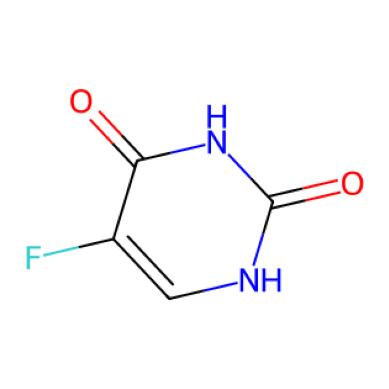

In [16]:
# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# SMILES string
# smiles = 'O=S(=O)(O)CCS(=O)(=O)O'
smiles = 'C1=C(C(=O)NC(=O)N1)F'
# smiles = 'Brc1ccc(SSc2ccc(Br)cc2)cc1'

# Convert SMILES to a molecule object
molecule = Chem.MolFromSmiles(smiles)

# Check if molecule is valid
if molecule is None:
    print("Invalid SMILES string")
else:
    # Visualize the molecular structure
    img = Draw.MolToImage(molecule, size=(300, 300))

    # Display the molecular graph
    plt.imshow(img)
    plt.axis('off')
    plt.show()


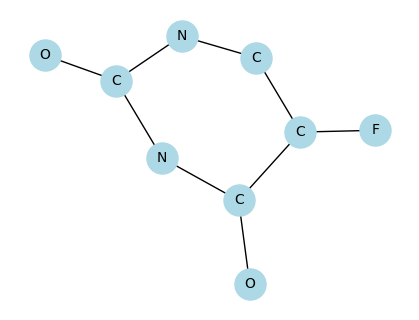

In [17]:
def mol_to_nx(molecule):
    G = nx.Graph()

    # Add nodes (atoms)
    for atom in molecule.GetAtoms():
        G.add_node(atom.GetIdx(), label=atom.GetSymbol())

    # Add edges (bonds)
    for bond in molecule.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

    return G

# Convert molecule to a NetworkX graph
G = mol_to_nx(molecule)

# Get labels for the nodes (atoms)
labels = nx.get_node_attributes(G, 'label')

# Plot the molecular graph using NetworkX
plt.figure(figsize=(4, 3))
pos = nx.spring_layout(G)  # Position the nodes for visualization
nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

## 4.3 How to Represent a Graph in Math?

### 4.3.1 Node Features
A feature matrix that describes the atoms in the molecule. In this case, we will use the atomic number (representing the atom type) as the feature for each node. For each atom in the molecule, we will extract its atomic number as a simple feature representation. The atomic number corresponds to the type of atom (e.g., Oxygen = 8, Carbon = 6, Sulfur = 16).

In [ ]:
molecule = Chem.MolFromSmiles(smiles)

# Get the number of atoms in the molecule
num_atoms = molecule.GetNumAtoms()



# Get atom types as node features (atomic numbers and symbols)
atom_types = []
atom_symbols = []
atomic_num_symbol_map = {}
## The atomic number of an atom is the number of protons in its nucleus
for atom in molecule.GetAtoms():
    atom_num = atom.GetAtomicNum()
    atom_symbol = atom.GetSymbol()

    atom_types.append(atom_num)  # Use atomic numbers as node features
    atom_symbols.append(atom_symbol)  # Use atomic symbols as labels

    # Map atomic number to symbol if not already in the map
    if atom_num not in atomic_num_symbol_map:
        atomic_num_symbol_map[atom_num] = atom_symbol
## The connection between atoms is represented by edges
edge_list = []
for bond in molecule.GetBonds():
    # Each bond connects two atoms (begin atom and end atom)
    atom1 = bond.GetBeginAtomIdx()
    atom2 = bond.GetEndAtomIdx()

    # Append both directions of the edge (atom1 -> atom2 and atom2 -> atom1)
    edge_list.append((atom1, atom2))
    edge_list.append((atom2, atom1))  # This ensures the edge is undirected
atom_types, adj_matrix, edge_list, atomic_num_symbol_map = process_molecule(smiles)
visualize_molecule_graph(edge_list, atom_types, atomic_num_symbol_map)
print("\nNode Features (Atom Types):")
for i, (atom_num, atom_symbol) in enumerate(zip(atom_types, atom_symbols)):
    print(f"Node {i}: Atomic Number = {atom_num}, Atom Type = {atom_symbol}")


### 4.3.2 Adjacency Matrix
Adjacency Matrix is a binary matrix that represents the presence or absence of bonds between pairs of atoms. We will extract the adjacency matrix from the molecule, where the matrix element at position \((i, j)\) indicates whether there is a bond between atom \(i\) and atom \(j\).
### Edge List Representation

In addition to using an adjacency matrix to represent the connections between atoms, another common way to represent graph structures is through an **edge list**. An edge list is a simple way to describe the connections (bonds) in a graph by listing pairs of nodes (atoms) that are connected by edges (bonds).

In the case of molecular graphs:
- **Nodes** represent atoms.
- **Edges** represent the bonds between atoms.

The edge list provides a more compact representation compared to the adjacency matrix, particularly for sparse graphs, where many possible connections do not exist.

### Steps to Create the Edge List:

1. **Extract Bonds from the Molecule**: Using RDKit, we extract the bonds between atoms. Each bond connects two atoms, which we can retrieve as a pair of indices.
  
2. **Build the Edge List**: For each bond in the molecule, we store the indices of the connected atoms as a tuple, creating an undirected edge list. Since chemical bonds are inherently undirected, we avoid adding duplicate edges.

3. **Interpret the Edge List**: Each tuple in the edge list represents a bond between two atoms, identified by their indices in the molecule.



In [ ]:
visualize_molecule_graph(edge_list, atom_types, atomic_num_symbol_map)
# Print the undirected edge list
print("\nUndirected Edge List:")
for edge in edge_list:
    print(edge)

The connectivity of the graph can also be described by the adjecency matrix:

In [ ]:
# The adjacency matrix (num_atoms x num_atoms)
adj_matrix = rdmolops.GetAdjacencyMatrix(molecule)
print("\nAdjacency Matrix:")
print(adj_matrix)

## 4.4 Process the Drug Data!

In [ ]:
drug_smiles_df = processor.drug_meta[['PubCHEM', 'SMILES']]

In [ ]:
processor.drug_meta.head()

In [ ]:
pubchem_list = []
smiles_list = []
atom_types_list = []
adj_matrix_list = []
edge_list_list = []
atomic_num_symbol_map_list = []
for idx, row in drug_smiles_df.iterrows():
    smiles = row['SMILES']
    pubchem_id = row['PubCHEM']
    atom_types, adj_matrix, edge_list, atomic_num_symbol_map = process_molecule(smiles)
    # Append the results to the respective lists
    pubchem_list.append(pubchem_id)
    smiles_list.append(smiles)
    atom_types_list.append(atom_types)
    adj_matrix_list.append(adj_matrix)
    edge_list_list.append(edge_list)
    atomic_num_symbol_map_list.append(atomic_num_symbol_map)

In [ ]:
df_processed = pd.DataFrame({
    'pubchem_id': pubchem_list,
    'smiles': smiles_list,
    'atom_types': atom_types_list,
    'adj_matrix': adj_matrix_list,
    'edge_list': edge_list_list,
    'atomic_num_symbol_map': atomic_num_symbol_map_list
})
df_processed.set_index('pubchem_id', inplace=True)
df_processed.head()

In [ ]:
from torch_geometric.data import Data
pyg_data_dict = {pubchem_id: Data(x=torch.tensor(df_processed.loc[pubchem_id]['atom_types'], dtype=torch.long), edge_index=torch.tensor(df_processed.loc[pubchem_id]['edge_list'], dtype=torch.long).t().contiguous()) for pubchem_id in pubchem_list}
pubchem_id_to_idx = {pubchem_id: idx for idx, pubchem_id in enumerate(pubchem_list)}

## 4.5 Prepare the Mol-Graph Dataset for DL!

We use Pytorch to implement the DL model. The `DrugResponseDataset` class simplifies the process of loading and fetching data required for drug response prediction tasks. It is built to efficiently handle large datasets by precomputing feature tensors for cancer cell lines and drug compounds during initialization. This allows for fast retrieval during training.

### Dataset Inputs:
- **train_df**: A DataFrame containing the **COSMIC_ID**, **PubCHEM_ID**, and **IC50 values** for the drug-cell line pairs.
- **exp_df**: A DataFrame containing the gene expression features for cancer cell lines, indexed by **COSMIC_ID**.
- **pyg_data_dict**: A dictionary containing the drug features, where each drug is represented as a PyTorch Geometric `Data` object, indexed by **PubCHEM_ID**.

### Core Components:

#### 1. Cancer Cell Line Features (`CCL_feature`):
The gene expression data for cancer cell lines is stored as a tensor during initialization. The features are accessed by mapping the **COSMIC_ID** from the training data to the corresponding row in `exp_df`.

#### 2. Drug Features (`drug_feature`):
Drug features are stored as PyTorch Geometric `Data` objects, which are preloaded from the `pyg_data_dict`. Each **PubCHEM_ID** in the training data maps to its corresponding graph-based drug feature.

#### 3. IC50 Values (`IC50_value`):
IC50 values, representing the drug response (inhibition concentration), are stored as tensors. The dataset provides a tensor for each drug-cell line pair, facilitating model training and prediction.


In [ ]:
# Split the GDSC2 data into train and test sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(processor.GDSC2_df, test_size=0.3, random_state=42)
# Display the shapes of the resulting datasets
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

In [ ]:
train_set = DrugResponseDataset(train_df.reset_index(drop=True), processor.exp_df, pyg_data_dict)
test_set = DrugResponseDataset(test_df.reset_index(drop=True), processor.exp_df, pyg_data_dict)

In [ ]:
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

In [ ]:
def _collate_fn(samples):
    CCL_feature, drug_feature, IC50 = map(list, zip(*samples))
    drug_feature = Batch.from_data_list(drug_feature)
    return torch.stack(CCL_feature), drug_feature, torch.stack(IC50)

In [ ]:
train_loader = DataLoader(train_set, batch_size=2048, shuffle=True, collate_fn=_collate_fn)
test_loader = DataLoader(test_set, batch_size=2048, shuffle=False, collate_fn=_collate_fn)

In [ ]:
next(iter(test_loader))

# 5. Graph Neural Network


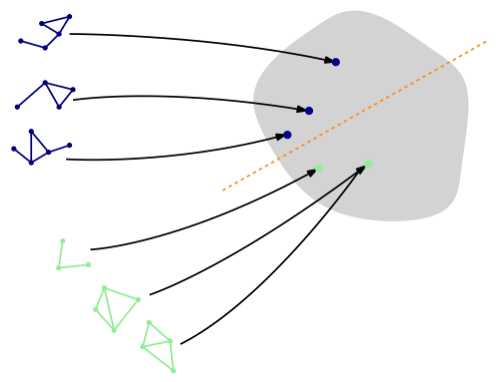


Graph-level supervised learning refers to the problem of classifiying/predicting entire graphs (in contrast to nodes), given a **dataset of graphs**, based on some structural graph properties. Here, we want to embed entire graphs.

**Our goal is to get a 'better vector' (Embedding) of each drug to make the final prediction via the GNN!**

## Learning Object:
You will learn for **Aim 3** here. Try your best to follow the equations!

### Formal Setup:
We aim to find a function that operates on features of the molecular graph.

#### *Inputs*:

1. **Feature Matrix (X):** A feature description  $x_i$ for each node \( i \) in the graph, summarized as an \( N $\times$ D \) matrix, where:
- \( N \): Number of nodes (atoms)
- \( D \): Number of input features per node
2. **Adjacency Matrix (A)**

#### *Hidden Representation during Training*:
**Node-level 'new' Feature (Z):** The function produces a node-level hidden vector \( Z \), which is an \( N $\times$ F \) feature matrix, where:
- \( N \): Number of nodes (atoms)
- \( F \): Output dimension.

#### *Graph-level Output*:
Graph-level outputs can be modeled by introducing a pooling operation, which aggregates the node-level outputs \( Z \) into a single representation $\mathbf{z}$ for the entire graph.

Every neural network layer can be written as a non-linear function:
$$
\mathbf{H}^{(l+1)} = f(\mathbf{H}^{(l)}, \mathbf{A}),
$$

with $\mathbf{H}^{(0)} = \mathbf{X}$ and $\mathbf{H}^{(L)} = \mathbf{z}$, where $L$ is the number of layers. The specific models differ only in how $f(\cdot, \cdot)$ is chosen and parameterized. While *Message-Passing* on graph is an idea to design the structure of $f(\cdot, \cdot)$.

## 5.1 Message Passing GNN

GNNs rely on message passing methods, where vertices exchange information with their neighbors by sending "messages" to each other. Before diving into the equations, let's visually understand how GNNs work. The process can be broken down into two main steps:

1. **Message Creation:** Each node creates a feature vector representing the message it intends to send to all its neighbors.

2. **Message Passing:** The messages are sent to the neighbors, where each node receives one message from every adjacent node. Below, we visualize these two steps for our example graph.

 <center><img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/graph_message_passing.svg?raw=1" alt="Graph Message Passing" style="width:700px; padding:10px;"></center>

One simple message-passing neural network can be defined as:
$$
f(H^l, A) = \sigma(AH^lW^l)
$$

There are two limitations:
1. For every node, we sum up all the feature vectors of all neighboring nodes but not the node itself!
2. Un-normalized A change the scale of the feature vectors.



## 5.2 Graph Convolutional Network

**Graph Convolutional Network (GCN)** is one example of the Message Passing neural network introduced by [Kipf et al.](https://openreview.net/pdf?id=SJU4ayYgl) in 2016. Unlike traditional convolutional neural networks (CNNs) that operate on grid-like data (such as images), GCNs are designed to generalize the convolution operation to the graph domain. This makes them powerful tools for tasks such as node classification, graph classification, and link prediction.

GCN address the limitations by:
1. Adding in the self-loop: $\tilde{A} = A + I$
2. Normalize the degree of each node.

Formally, the graph convolution operation can be written as:

$$
H^{(l+1)} = \sigma(\tilde{D}^{-1/2} \tilde{A} \tilde{D}^{-1/2} H^{(l)} W^{(l)})
$$

Where:

- $\displaystyle H^{(l)}$ is the feature matrix at layer \(l\), of shape [num_node, feature_dim]
- $\displaystyle \tilde{A} = A + I$ is the adjacency matrix with added self-loops,
- $\displaystyle \tilde{D}$ is the degree matrix corresponding to $\tilde{A}$,
- $\displaystyle W^{(l)}$ is the weight matrix at layer \(l\), of shape [feature_dim, feature_dim_next]
- $\displaystyle \sigma$ is an activation function (e.g., ReLU).

### Step 1: The GCN Layer
In this step, we define the core operation of the Graph Convolutional Network (GCN) layer. The GCN layer performs three main tasks:
1. **Message Passing**: This involves aggregating the features from a node’s neighbors, which is done by multiplying the normalized adjacency matrix $\hat{\mathbf{A}}$ with the feature matrix $\mathbf{X}$. This can be expressed as: $$ \mathbf{H}^{(l+1)} = \hat{\mathbf{A}} \mathbf{H}^{(l)}. $$
Where:
- $\hat{\mathbf{A}} = \tilde{D}^{-1/2} \tilde{A} \tilde{D}^{-1/2}$

In [ ]:
num_nodes = len(atom_types)
adj_matrix = np.zeros((num_nodes, num_nodes))
for edge in edge_list:
    adj_matrix[edge[0], edge[1]] = 1
## Add self-loops
adj_matrix += np.eye(num_nodes)
print("Adjacency Matrix with Self-Loops:")
print(adj_matrix)

# Normalize the adjacency matrix with the degree matrix
degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
degree_matrix_inv_sqrt = np.linalg.inv(np.sqrt(degree_matrix))  # D^(-1/2)
adj_matrix_normalized = degree_matrix_inv_sqrt @ adj_matrix @ degree_matrix_inv_sqrt  # D^(-1/2) * A * D^(-1/2)
print("Normalized Adjacency Matrix:")
print(adj_matrix_normalized)

2. **Linear Transformation**: After the message passing step, the GCN applies a linear transformation using a weight matrix $\mathbf{W}$. The transformed features are given by: $$ \mathbf{H}^{(l+1)} = \hat{\mathbf{A}} \mathbf{H}^{(l)} \mathbf{W} $$

In [ ]:
# Define the ReLU function
def ReLU(x: np.ndarray) -> np.ndarray:
    return x * (x > 0)
# Dfine the softmax function
def softmax(x: np.ndarray) -> np.ndarray:
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stabilize softmax
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def gcn_layer(features, adj_norm, weights):
    # Perform message passing (adjacency matrix * features)
    aggregated_features = adj_norm @ features
    # Apply the weight matrix (linear transformation)
    transformed_features = aggregated_features @ weights
    # Apply an activation function (ReLU)
    activated_features = ReLU(transformed_features)  # ReLU
    return activated_features

# Initialize the node features as the atomic numbers of the atoms
atom_feature = np.array(atom_types)

# Reshape node features: atomic numbers as 1D features for each node
input_features = atom_feature.reshape(-1, 1)  # Shape: (num_nodes, input_dim=1)

# Define the output dimension of the GCN layer (number of output features per node)
output_dim = 4  # Output dimension of the GCN layer

# Initialize random weights for the GCN layer (shape: input_dim x output_dim)
seed = 42
np.random.seed(seed)
weights = np.random.rand(1, output_dim)  # For simplicity, we use 1D input and 4D output

print("Input Features (Node Features):")
print(input_features.shape)

print("\nRandomly Initialized Weights:")
print(weights)

3. **Activation Function**: To introduce non-linearity, we apply the ReLU (Rectified Linear Unit) activation function, which is defined as: $$ \text{ReLU}(x) = \max(0, x) $$ The final output of the GCN layer is the activated feature matrix: $$ \mathbf{H}^{(l+1)} = \text{ReLU}(\hat{\mathbf{A}} \mathbf{H}^{(l)} \mathbf{W}) $$

In [ ]:
gcn_output = gcn_layer(input_features, adj_matrix_normalized, weights)

# Output the GCN-transformed node features
print("GCN Output (Node Features after GCN Layer):")
print(gcn_output.shape)

### Step 2: Defining Pooling Functions for Graph-Level Task (Classification/Regression)

In graph classification tasks, we need to aggregate node features into a single graph-level feature vector. This aggregation is achieved through pooling operations. Below are two commonly used pooling methods:

#### 1. Global Mean Pooling

Global mean pooling computes the average of the node features across all nodes:
$$
\mathbf{z} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{h}_i
$$
where:
- \(\mathbf{h}_i\) represents the feature vector of the \(i\)-th node,
- \(N\) is the total number of nodes in the graph.

This method effectively summarizes the graph by averaging all node features.

#### 2. Global Max Pooling

Global max pooling takes the maximum value for each feature across all nodes:
$$
\mathbf{z} = \max_{i=1}^{N} \mathbf{h}_i
$$
This method emphasizes the most important or largest feature values in the graph, which can be useful when only certain nodes dominate the representation.

We can now define these pooling functions to aggregate node features into a single vector, \(\mathbf{z}\), suitable for graph-level learning tasks such as classification or regression.


### Step 3: Final layout of GNN by multiple GCN layers

The GNN can be build up by a sequence of GCN layers and non-linearities such as ReLU. For a visualization, see below (figure credit - [Thomas Kipf, 2016](https://tkipf.github.io/graph-convolutional-networks/)).

<center width="100%" style="padding: 10px"><img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/gcn_network.png?raw=1" width="600px"></center>


## 5.3 Graph Isomorphism Network
**Graph Isomorphism Network (GIN)** is another type of message-passing GNN by [Xu et al.](https://arxiv.org/abs/1810.00826v3) in 2018.
The update rule for node features in GIN is given by:
$$ \mathbf{h}_v^{(k+1)} = \text{MLP}\left( (1 + \epsilon^{(k)}) \cdot \mathbf{h}_v^{(k)} + \sum_{u \in \mathcal{N}(v)} \mathbf{h}_u^{(k)} \right) $$

### Explanation:
- $\mathbf{h}_v^{(k)}$: The feature vector of node $v$ at the $k$-th layer.
- $\mathcal{N}(v)$: The set of neighbors of node $v$. - $\epsilon^{(k)}$: A learnable parameter at the $k$-th layer.
- **MLP**: A Multi-Layer Perceptron, which is applied after the aggregation step to update the node features.
 The key feature of GIN is the addition of the learnable parameter $\epsilon^{(k)}$, which controls how much of the node's own feature is retained during the message passing process. This makes GIN more powerful at distinguishing graphs than simpler aggregation schemes like summing or averaging.

In the next section, we will use GCN and GIN to build the drug response prediction model.

# 6. Graph Neural Network for Drug Response Prediction
Here, we implemented the drug response model GraphDRP developed by Tuan Nguyen et al.


<img src="https://github.com/matcyr/APBJC2024_GNN_Tutorial/blob/master/Figures/GraphDRP.png?raw=1" alt="DRP Pipeline" width="800" height="200">


*An illustration of GraphDRP. Graph Convolutional Networks for Drug Response Prediction. IEEE/ACM Trans Comput Biol Bioinform. 2022;19(1):146-154.*

### Next part is for training, while we only show inference the model at the tutorial.

We have extended version provided in [Github](https://github.com/matcyr/APBJC2024_GNN_Tutorial/tree/master/notebooks).

In [ ]:
# learning_rate = 1e-3
# num_epochs = 31
# device = torch.device('cuda')
# for conv_type in ['GIN', 'GCN']:
#     model = DrpModel(graph_conv=conv_type).to(device)
#                 # Loss and optimizer
#     criterion = nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#     best_val_rmse = 20
#     best_rmse = 20
#     best_mae = 2
#     best_r2 = -2
#     best_pcc = -2
#     patient = 0
#     best_epoch = 0

#     for epoch in range(num_epochs):
#         train_loss = train(model, train_loader, criterion, optimizer, device)
#         print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')
#         if epoch % 5 == 0:
#             predictions, true_values = test(model, test_loader, device)
#             best_rmse, best_mae, best_r2, best_pcc = test_metric(true_values, predictions)
#             print(f'Epoch [{epoch+1}/{num_epochs}], \n'
#                 f'Test RMSE: {best_rmse:.4f}, Test MAE: {best_mae:.4f}, Test R2: {best_r2:.4f}, Test PCC: {best_pcc:.4f}')
#     print("Training completed.")
#     if not os.path.exists('../weights/'):
#         os.makedirs('../weights/')
#     torch.save(model.state_dict(), f'../weights/{conv_type}_model.pth')

In [ ]:
device = 'cpu'
## Get the max artomic number
max_atom_num = max([max(atom_types) for atom_types in df_processed['atom_types']]) + 1
num_genes = processor.exp_df.shape[1]
## Define the model!
model_GIN = DrpModel(max_atom_num = max_atom_num, num_genes = num_genes, graph_conv='GIN')
model_GCN = DrpModel(max_atom_num = max_atom_num, num_genes = num_genes,
graph_conv='GCN')
## Load the weight from gpu to cpu
model_GIN.load_state_dict(torch.load('../weights/GIN_model.pth', map_location=torch.device('cpu'), weights_only = False))
model_GCN.load_state_dict(torch.load('../weights/GCN_model.pth', map_location=torch.device('cpu'), weights_only = False))

In [ ]:
model_GIN

### Let's make the prediction using the loaded model:

In [ ]:
predictions, true_values = test(model_GIN, test_loader, device)
predictions_GCN, true_values_GCN = test(model_GCN, test_loader, device)

### What's the prediction performance!

### Evaluation metrices.

$y_i$: True IC50 value.

$\hat{y}_i$: Predicted IC50 value.
1. **Mean Squared Error (MSE)**:  
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- Lower MSE is better, as it indicates less error between the predicted and actual values.

2. **Mean Absolute Error (MAE)**:  
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
- Lower MAE is better, indicating less deviation from the true values.

3. **R-squared (R²)**:  
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
- Higher R² is better, as it shows that the model explains more variance of the data.

4. **Pearson Correlation Coefficient (PCC)**:  
$$
\text{PCC} = \frac{\sum_{i=1}^{n} (y_i - \bar{y})(\hat{y}_i - \overline{\hat{y}})}{\sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2} \sqrt{\sum_{i=1}^{n} (\hat{y}_i - \overline{\hat{y}})^2}}
$$
- Higher PCC is better, as it indicates stronger linear correlation between actual and predicted values.



In [ ]:
rmse, mae, r2, pcc = test_metric(true_values, predictions)
rmse_GCN, mae_GCN, r2_GCN, pcc_GCN = test_metric(true_values_GCN, predictions_GCN)
## Conver the prediction back to the dataframe
result_df = pd.DataFrame(columns = ['RMSE', 'MAE', 'R2', 'PCC'])
test_df['Predicted IC50 GIN'] = predictions
test_df['Predicted IC50 GCN'] = predictions_GCN

In [ ]:
test_df.head()

In [ ]:
## Scatter plot for the prediction
plt.figure(figsize=(8, 6))
plt.scatter(test_df['LN_IC50'], test_df['Predicted IC50 GIN'], alpha=0.5, label=f'GIN: RMSE={rmse:.2f}, R2={r2:.2f}')
plt.scatter(test_df['LN_IC50'], test_df['Predicted IC50 GCN'], alpha=0.5, label=f'GCN: RMSE={rmse_GCN:.2f}, R2={r2_GCN:.2f}')
plt.xlabel('True IC50 (LN scale)')
plt.ylabel('Predicted IC50 (LN scale)')
plt.title('True vs Predicted IC50')
plt.legend()
plt.show()

In [ ]:
cancer_meta_df = processor.df[['COSMIC_ID', 'TCGA_DESC']].drop_duplicates()
drug_meta_df = processor.drug_meta[['PubCHEM', 'Target pathway']]
test_df = cancer_meta_df.merge(test_df, on='COSMIC_ID')
test_df = test_df.merge(drug_meta_df, on='PubCHEM')

### What about the performance between drugs?

In [ ]:
drug_result_df = get_per_drug_df(test_df=test_df, pred_col = 'Predicted IC50 GIN')
drug_result_df.sort_values('RMSE', ascending=False, inplace=True)

In [ ]:
drug_result_df

In [ ]:
## Set the PubCHEM column to numeric
test_df['PubCHEM'] = pd.to_numeric(test_df['PubCHEM'], errors='coerce')
test_df['COSMIC_ID'] = pd.to_numeric(test_df['COSMIC_ID'], errors='coerce')
train_df['PubCHEM'] = pd.to_numeric(train_df['PubCHEM'], errors='coerce')
train_df['COSMIC_ID'] = pd.to_numeric(train_df['COSMIC_ID'], errors='coerce')

In [ ]:
## Set the index of drug_result_df to numeric
drug_result_df.index = pd.to_numeric(drug_result_df.index, errors='coerce')
drug_smiles_df['PubCHEM'] = pd.to_numeric(drug_smiles_df['PubCHEM'], errors='coerce')

In [ ]:
## Visualize the RMSE for each drug
drug_1 = 6914657
drug_2 = 104741

# Create a figure with 1 row and 2 columns
fig, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, figsize=(10, 8))

# Subplot 1: True vs Predicted IC50 for ACC
sub_df_1 = test_df[test_df['PubCHEM'] == drug_1]
ax1.scatter(sub_df_1['LN_IC50'], sub_df_1['Predicted IC50 GIN'], alpha=0.5, label=f'RMSE={drug_result_df.loc[drug_1, "RMSE"]:.2f} \n R2={drug_result_df.loc[drug_1, "R2"]:.2f}')
ax1.set_xlabel('True IC50 (LN scale)')
ax1.set_ylabel('Predicted IC50 (LN scale)')
ax1.set_title(f'True vs Predicted IC50 for {drug_1} using GIN')
ax1.text(0.05, 0.95, f'RMSE={drug_result_df.loc[drug_1, "RMSE"]:.2f}\nR²={drug_result_df.loc[drug_1, "R2"]:.2f}',
         transform=ax1.transAxes, verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Subplot 2: True vs Predicted IC50 for STAD
sub_df_2 = test_df[test_df['PubCHEM'] == drug_2]
ax2.scatter(sub_df_2['LN_IC50'], sub_df_2['Predicted IC50 GIN'], alpha=0.5, color='orange')
ax2.set_xlabel('True IC50 (LN scale)')
ax2.set_ylabel('Predicted IC50 (LN scale)')
ax2.set_title(f'True vs Predicted IC50 for {drug_2} using GIN')
ax2.text(0.05, 0.95, f'RMSE={drug_result_df.loc[drug_2, "RMSE"]:.2f}\nR²={drug_result_df.loc[drug_2, "R2"]:.2f}',
         transform=ax2.transAxes, verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
# Adjust the layout

drug_1_smiles = drug_smiles_df[drug_smiles_df.PubCHEM == drug_1].SMILES.values[0]
drug_2_smiles = drug_smiles_df[drug_smiles_df.PubCHEM == drug_2].SMILES.values[0]
molecule = Chem.MolFromSmiles(drug_1_smiles)
# Check if molecule is valid
if molecule is None:
    print("Invalid SMILES string")
else:
    # Visualize the molecular structure
    img = Draw.MolToImage(molecule)
    ax3.set_title(f'Molecule for Drug {drug_1}')
    # Display the molecular graph
    ax3.imshow(img)
    ax3.axis('off')
    # ax1.show()
    img2 = Draw.MolToImage(Chem.MolFromSmiles(drug_2_smiles), size=(300, 300))
    ax4.set_title(f'Molecule for Drug {drug_2}')
    ax4.imshow(img2)
    ax4.axis('off')


plt.tight_layout()
plt.show()

### Let's compare the results with the linear regression!

In [ ]:
## Train the Lasso-regression model
from sklearn.linear_model import Lasso
linear_result_df = pd.DataFrame(columns = ['RMSE', 'MAE', 'R2', 'PCC'])
def per_drug_lasso(drug):
    sub_train_df = train_df[train_df.PubCHEM == drug]
    sub_test_df = test_df[test_df.PubCHEM == drug][['PubCHEM',	'COSMIC_ID',	'LN_IC50']]
    X_train = sub_train_df.merge(processor.exp_df, left_on='COSMIC_ID', right_index=True).drop(columns=['COSMIC_ID', 'PubCHEM', 'LN_IC50'])
    X_train = X_train.values
    y_train = sub_train_df['LN_IC50']
    X_test = sub_test_df.merge(processor.exp_df, left_on='COSMIC_ID', right_index=True).drop(columns=['COSMIC_ID', 'PubCHEM', 'LN_IC50'])
    X_test = X_test.values
    y_test = sub_test_df['LN_IC50']
    model = Lasso(alpha=0.1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    pcc, _ = pearsonr(y_test, predictions)
    return rmse, mae, r2, pcc

In [ ]:
for drug in test_df['PubCHEM'].unique():
    rmse, mae, r2, pcc = per_drug_lasso(drug)
    linear_result_df.loc[drug, 'RMSE'] = rmse
    linear_result_df.loc[drug, 'MAE'] = mae
    linear_result_df.loc[drug, 'R2'] = r2
    linear_result_df.loc[drug, 'PCC'] = pcc

In [ ]:
linear_result_df.sort_values('RMSE', ascending=False, inplace=True)
combined_df = drug_result_df.merge(linear_result_df, left_index=True, right_index=True, suffixes=('_GIN', '_Lasso'))

In [ ]:
import seaborn as sns

combined_df['RMSE_GIN'] = pd.to_numeric(combined_df['RMSE_GIN'], errors='coerce')
combined_df['RMSE_Lasso'] = pd.to_numeric(combined_df['RMSE_Lasso'], errors='coerce')

# Drop any rows with NaN values
combined_df = combined_df.dropna(subset=['RMSE_GIN', 'RMSE_Lasso'])
joint_plot = sns.jointplot(x=combined_df['RMSE_GIN'], y=combined_df['RMSE_Lasso'], color="#3C5488FF", height= 5, ratio=5)
joint_plot.set_axis_labels("GIN", "Lasso", fontsize=12)
joint_plot.fig.set_figwidth(6)
joint_plot.fig.suptitle('RMSE Comparison between GIN and Lasso for each drug')
joint_plot.fig.tight_layout()
# Add y = x line
ax = joint_plot.ax_joint
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, '--', alpha=0.7, zorder=0)  # Red dashed line for y = x
ax.set_xlim(lims)
ax.set_ylim(lims)

# Compute Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(combined_df['RMSE_GIN'], combined_df['RMSE_Lasso'])

## Display the mean and median RMSE for Lasso
mean_rmse_lasso = combined_df['RMSE_Lasso'].mean()
median_rmse_lasso = combined_df['RMSE_Lasso'].median()
plt.text(0.05, 0.85, f'Mean RMSE: {mean_rmse_lasso:.2f} \nMedian RMSE: {median_rmse_lasso:.2f}',
         transform=ax.transAxes, verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
mean_rmse_gin = combined_df['RMSE_GIN'].mean()
median_rmse_gin = combined_df['RMSE_GIN'].median()
plt.text(0.55, 0.15, f'Mean RMSE: {mean_rmse_gin:.2f} \nMedian RMSE: {median_rmse_gin:.2f}',
         transform=ax.transAxes, verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


# 7. Conclusion

In this notebook, we explored the application of Graph Neural Networks (GNNs) for drug response prediction, focusing on predicting IC50 values across various cancer cell lines. Through the integration of molecular graphs (representing drugs) and gene expression data (representing cancer cell lines), we demonstrated the effectiveness of GNN-based models in capturing complex relationships between drug structure and cancer cell behavior.

## Key takeaways from this notebook include:

1. **Data Processing**: We processed the GDSC2 dataset, combining drug features (derived from SMILES) and cancer cell line features (derived from gene expression data) to build a robust dataset for drug response prediction.
   
2. **Model Training**: We trained a Graph Neural Network (GNN) model to predict the drug response (IC50 values) for different cancer cell lines. By treating each drug as a graph, the GNN was able to learn intricate molecular relationships that influence drug efficacy.

3. **Baseline Comparison**: The GNN model's performance was compared to a baseline model (Lasso regression). The GNN outperformed Lasso in terms of key metrics such as RMSE and R², demonstrating its superior ability to model the interactions between drugs and cell lines.

4. **Model Evaluation**: Visualizations of predicted vs. true IC50 values for specific cancer types showed that the GNN model provides more accurate predictions, closely matching the true drug responses.

- **GNN Model**: Achieved strong predictive performance by leveraging molecular graph structures, capturing complex drug-cell interactions that other linear models (such as Lasso) may miss.
- **Baseline Model**: Although Lasso is a reliable model for simpler prediction tasks, it was outperformed by the GNN model, highlighting the benefits of using deep learning models for drug response prediction.

Graph Neural Networks (GNNs) offer a powerful approach for drug response prediction, outperforming traditional models like Lasso in this task. The ability of GNNs to model molecular structures as graphs allows for a more nuanced understanding of drug efficacy, making them a promising tool in precision oncology and pharmacogenomics. This work demonstrates the potential of GNNs in drug discovery, where accurate prediction of drug response is critical for developing targeted cancer therapies.

